## CS 7641 Machine Learning
## Assignment 3 Unsupervised Learning and Dimensional Deduction
#### Experiment: Step 3 Combination of Clustering & Dimensionality Reduction
#### Algorithms: EM, KMeans + PCA, ICA, Randomized Projections, TruncatedSVD
#### Data      : AIDS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from scipy.stats import kurtosis 

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import FastICA, PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import SparseRandomProjection


from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## AIDS Clinical Trials Group Stury 175

In [2]:
#
# data: AIDS Clinical Trials Group Study 175
# source: https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

#
# Start Loading Data
# Using the provided method from UDI ()
# Pakcage Installation needed
# pip install ucimlrepo
# 

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 

#
# End Loading Data
#

In [3]:
y=y.cid

X_raw = X
y_raw = y

## KMeans (Clustering) + PCA (Linear Dimensionality Reduction)

Text(0, 0.5, 'Scores')

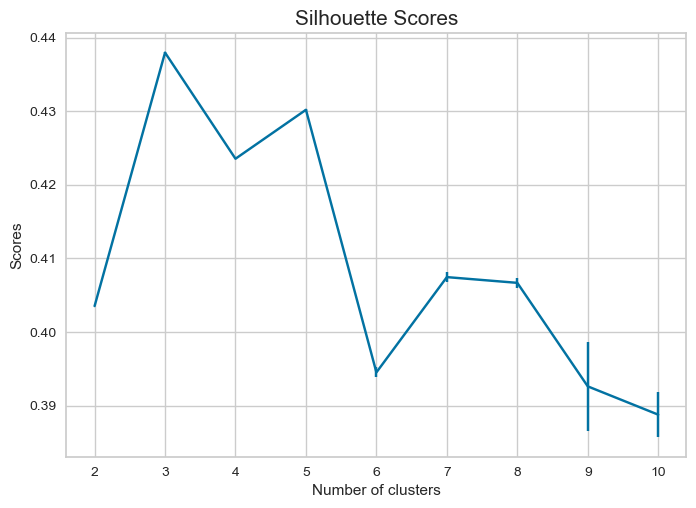

In [4]:
##
## KMeans + PCA
## 

model = PCA(n_components=2).fit(X_raw)
X_raw_transformed = model.transform(X_raw)
num_clusters = 10 # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters=np.arange(2, num_clusters+1)
silhouettes=[]
silhouettes_errors=[]
iterations=num_clusters+1

for n in list_clusters:
    silhouettes_tmp=[]
    for _ in range(iterations):
        classifier=model(n).fit(X_raw_transformed) 
        y_pred=classifier.predict(X_raw_transformed)
        silhouette=metrics.silhouette_score(X_raw_transformed, y_pred, metric='euclidean')
        silhouettes_tmp.append(silhouette)
    temp = np.array(silhouettes_tmp)
    mean=np.mean(temp[np.argsort(temp)[:int(iterations/5)]])
    std=np.std(silhouettes_tmp)
    silhouettes.append(mean)
    silhouettes_errors.append(std)

plt.errorbar(list_clusters, silhouettes, yerr=silhouettes_errors)
plt.title("Silhouette Scores", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Scores")

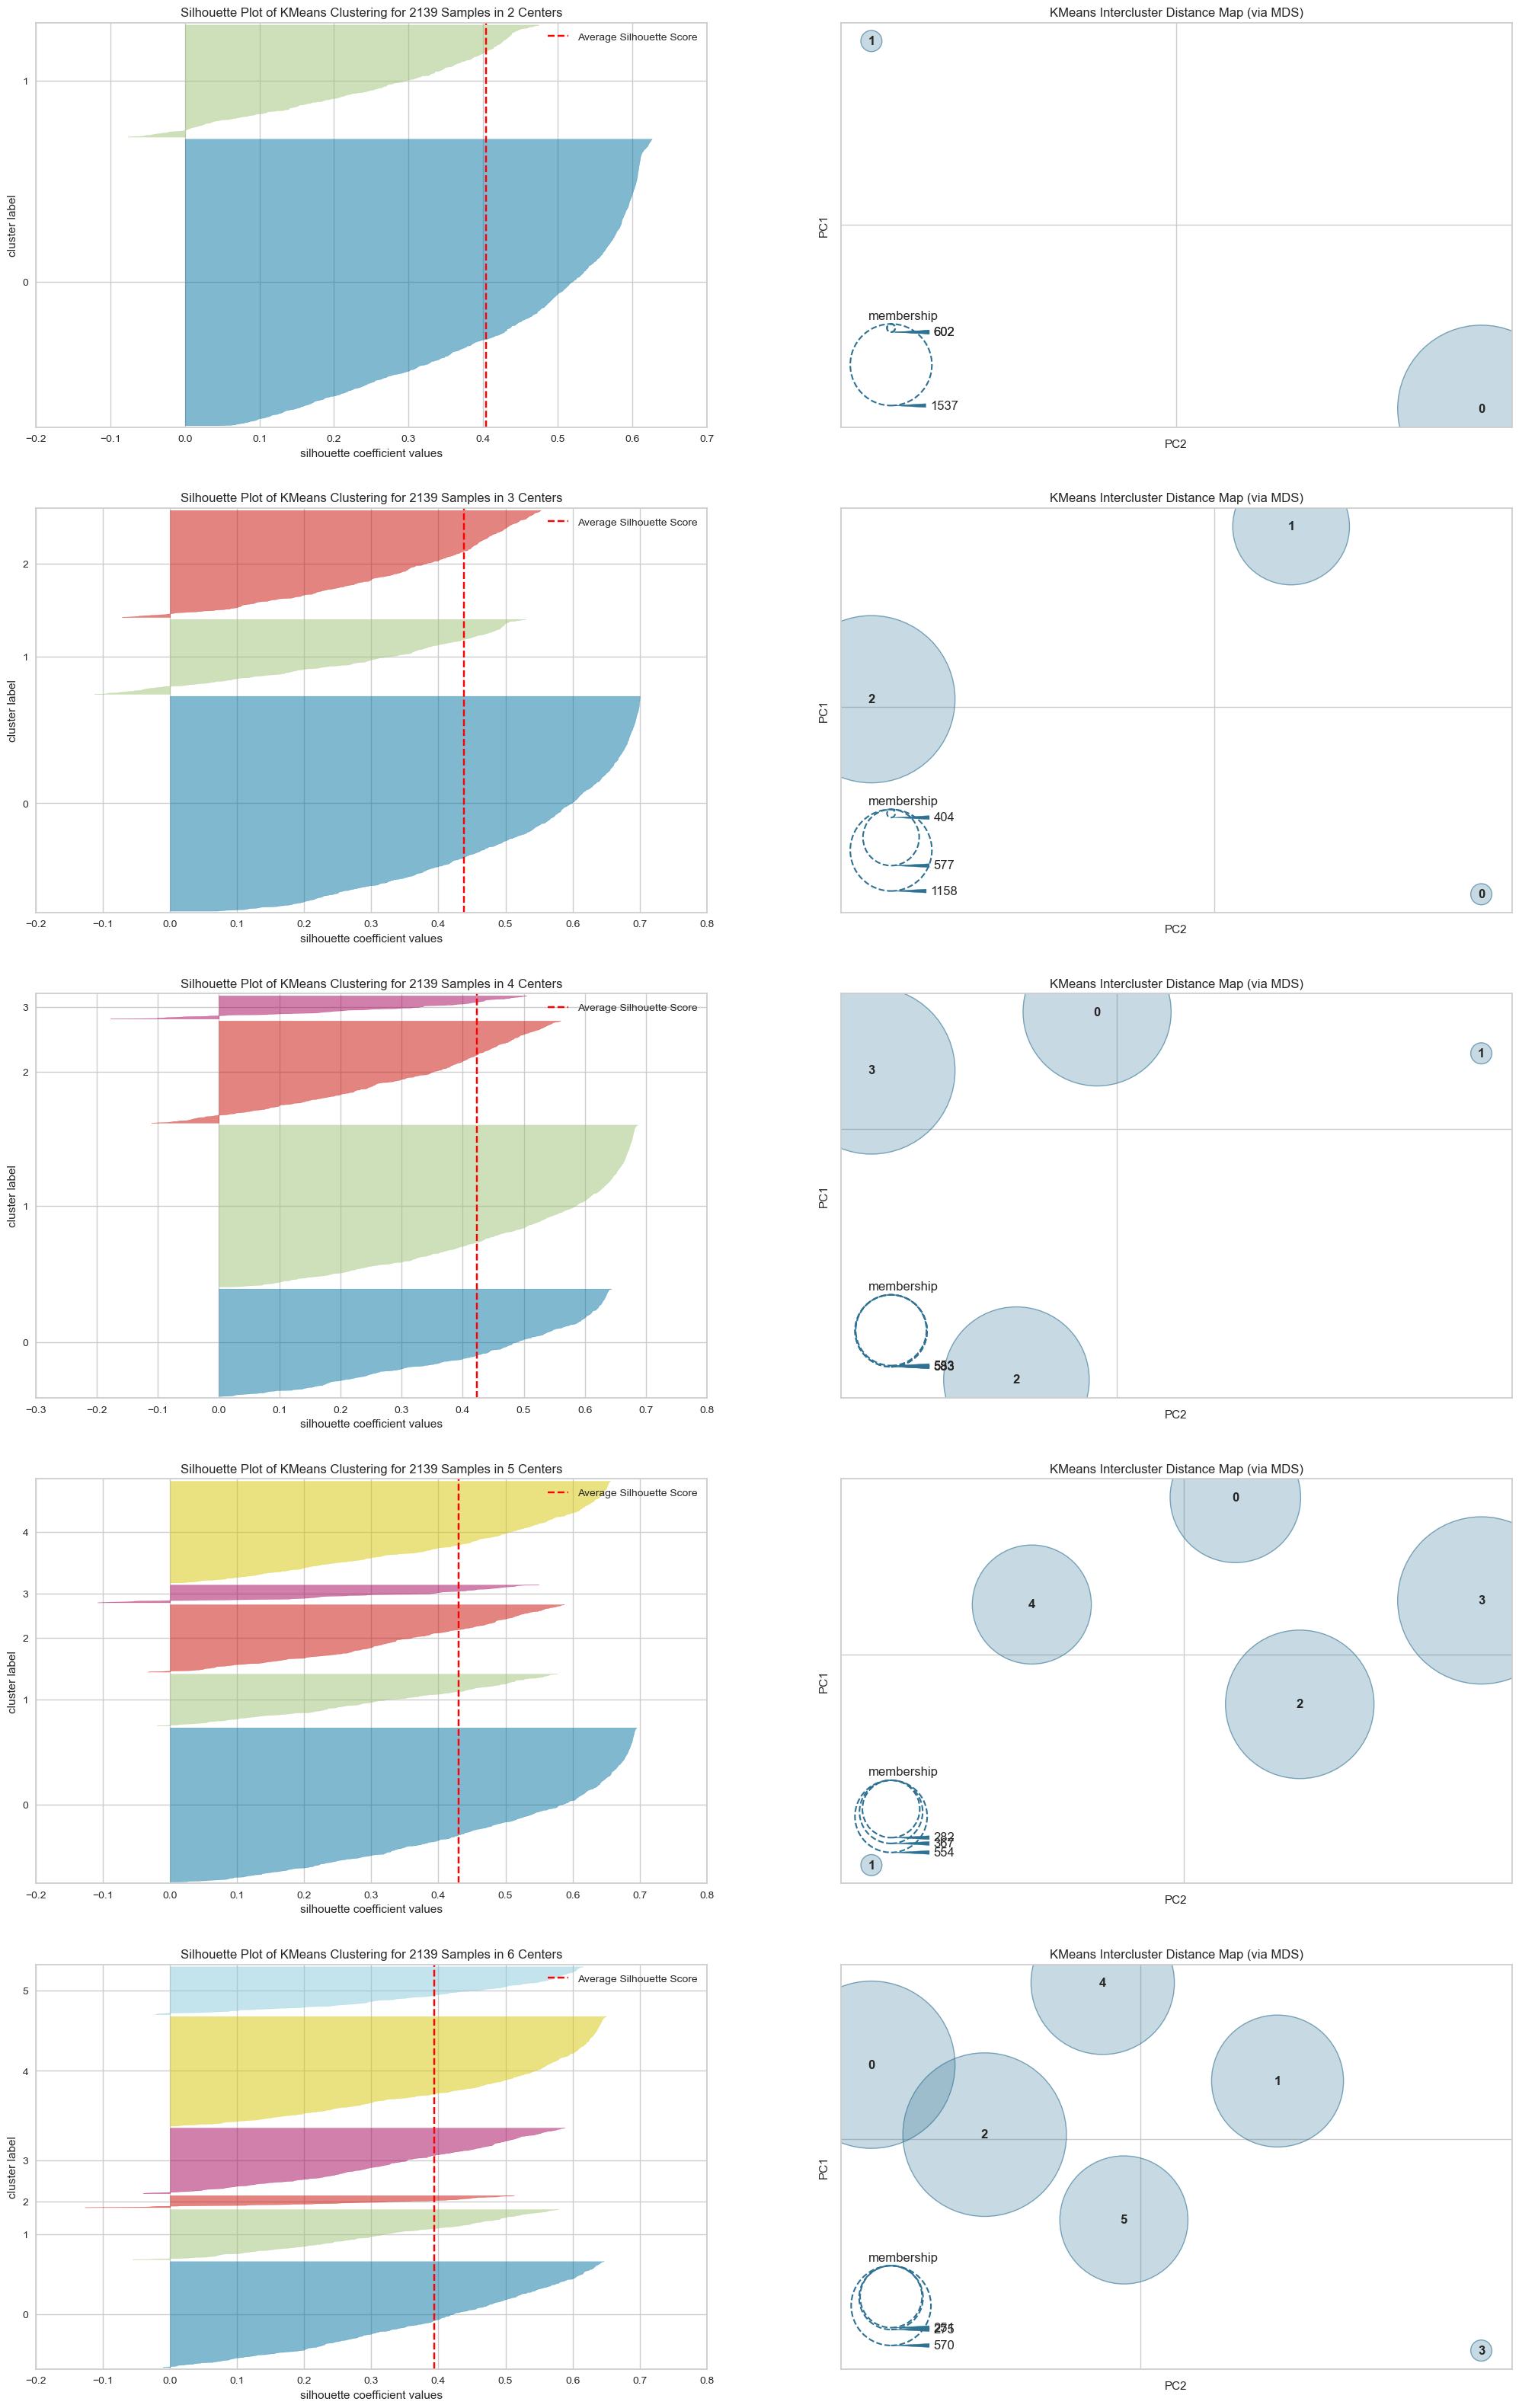

In [5]:
##
## SilhouetteVisualizer & InterclusterDistance (KMeans)
##

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
num_plots = len(list_clusters)
fig, axes = plt.subplots(num_plots, 2, figsize=[25,40])
col_ = 0
for i in list_clusters:
    classifier = model(n_clusters=i, algorithm="full")
    visualizer = SilhouetteVisualizer(classifier, colors='yellowbrick', ax=axes[col_][0])
    visualizer.fit(X_raw_transformed)
    visualizer.finalize()
        
    classifier = model(n_clusters=i, algorithm="full")
    visualizer = InterclusterDistance(classifier, ax=axes[col_][1])
    visualizer.fit(X_raw_transformed)
    visualizer.finalize()
        
    col_+=1
plt.show()

In [8]:
## 
## KMeans + PCA Training Time and Accuracy
## 

num_clusters = 2

# Training Time
start_time = time.perf_counter()
model = KMeans(n_clusters= num_clusters).fit(X_raw_transformed)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_transformed, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.10073708300478756
Cross Validation Score: 0.6663086287146438
Test Accuracy: 0.6915887850467289


## KMeans (Clustering) + ICA (Linear Dimensionality Reduction)

Text(0, 0.5, 'Scores')

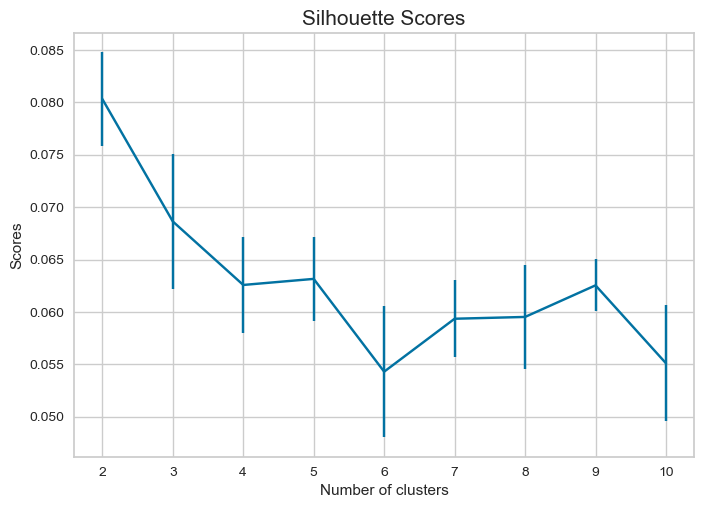

In [9]:
##
## KMeans + ICA
## 

model = FastICA(n_components=14, max_iter=10000, tol=0.1).fit(X_raw)

X_raw_transformed = model.transform(X_raw)
num_clusters = 10 # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters=np.arange(2, num_clusters+1)
silhouettes=[]
silhouettes_errors=[]
iterations=num_clusters+1

for n in list_clusters:
    silhouettes_tmp=[]
    for _ in range(iterations):
        classifier=model(n).fit(X_raw_transformed) 
        y_pred=classifier.predict(X_raw_transformed)
        silhouette=metrics.silhouette_score(X_raw_transformed, y_pred, metric='euclidean')
        silhouettes_tmp.append(silhouette)
    temp = np.array(silhouettes_tmp)
    mean=np.mean(temp[np.argsort(temp)[:int(iterations/5)]])
    std=np.std(silhouettes_tmp)
    silhouettes.append(mean)
    silhouettes_errors.append(std)

plt.errorbar(list_clusters, silhouettes, yerr=silhouettes_errors)
plt.title("Silhouette Scores", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Scores")

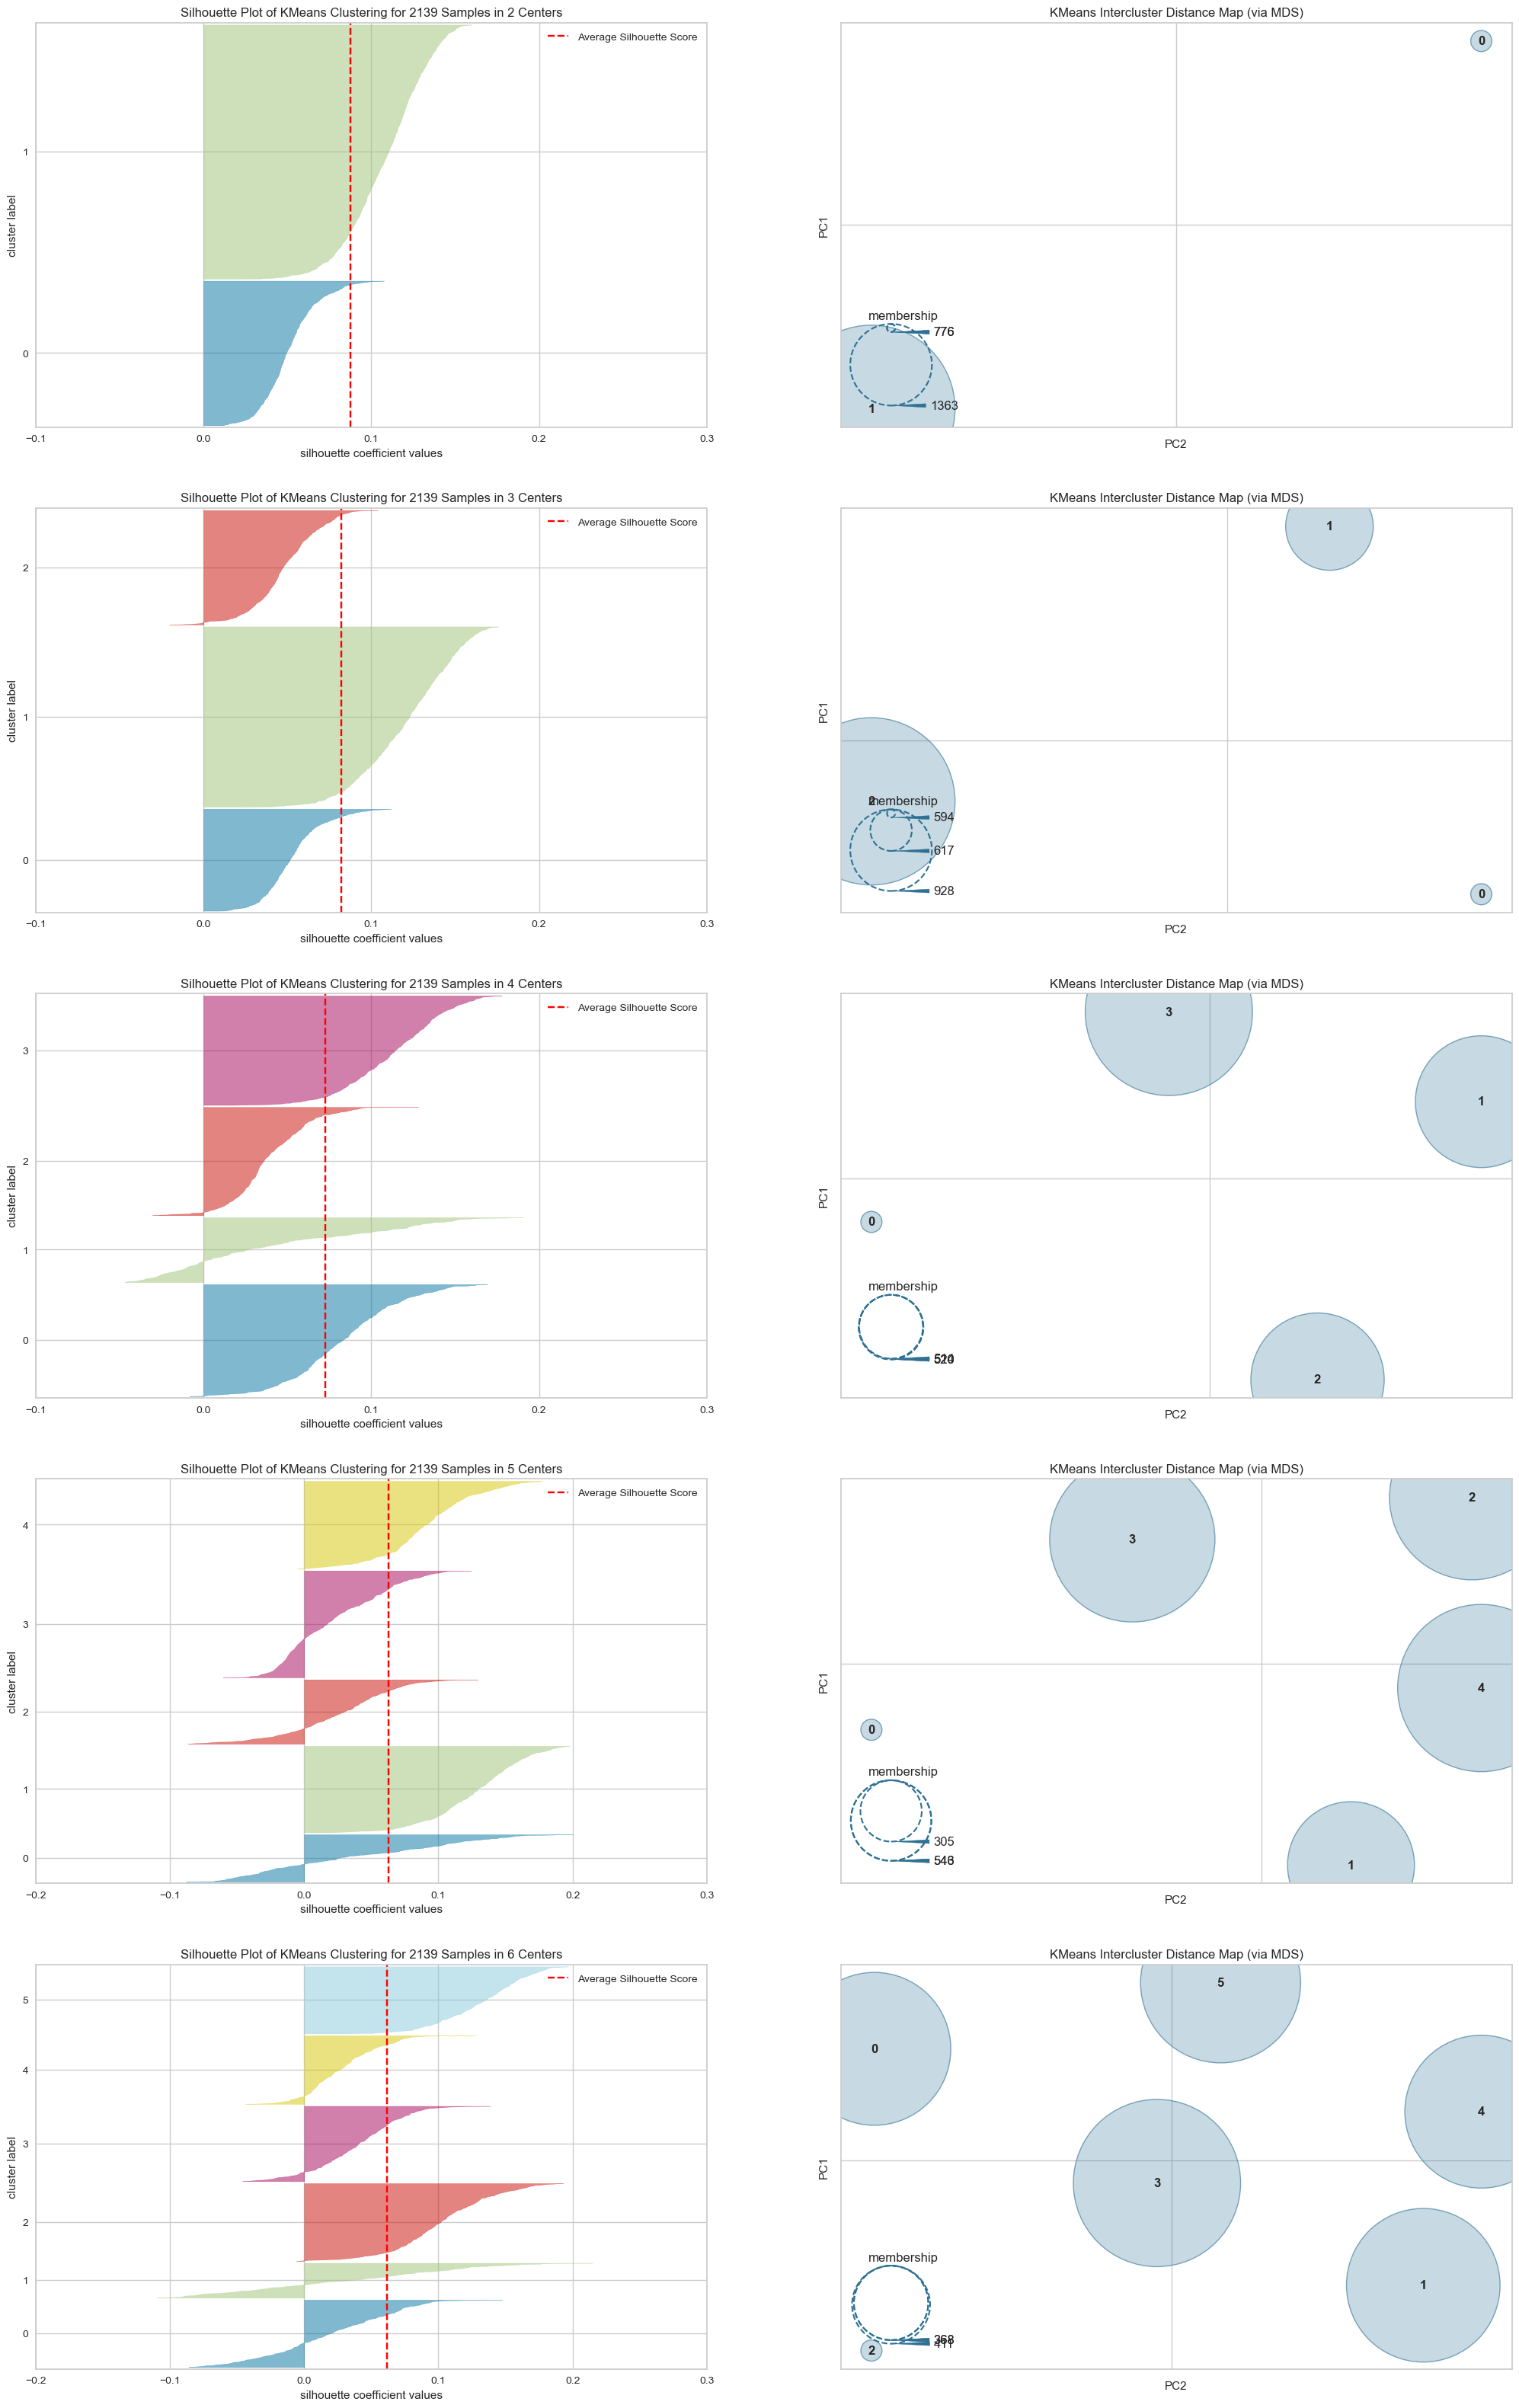

In [10]:
##
## SilhouetteVisualizer & InterclusterDistance (KMeans)
##

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
num_plots = len(list_clusters)
fig, axes = plt.subplots(num_plots, 2, figsize=[25,40])
col_ = 0
for i in list_clusters:
    classifier = model(n_clusters=i, algorithm="full")
    visualizer = SilhouetteVisualizer(classifier, colors='yellowbrick', ax=axes[col_][0])
    visualizer.fit(X_raw_transformed)
    visualizer.finalize()
        
    classifier = model(n_clusters=i, algorithm="full")
    visualizer = InterclusterDistance(classifier, ax=axes[col_][1])
    visualizer.fit(X_raw_transformed)
    visualizer.finalize()
        
    col_+=1
plt.show()

In [16]:
## 
## KMeans + ICA Training Time and Accuracy
## 

num_clusters = 4

# Training Time
start_time = time.perf_counter()
model = KMeans(n_clusters= num_clusters).fit(X_raw_transformed)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_transformed, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.4106122499797493
Cross Validation Score: 0.8527048914804016
Test Accuracy: 0.8574766355140186


## KMeans (Clustering) + Randomized Projections (Linear Dimensionality Reduction)

Text(0, 0.5, 'Scores')

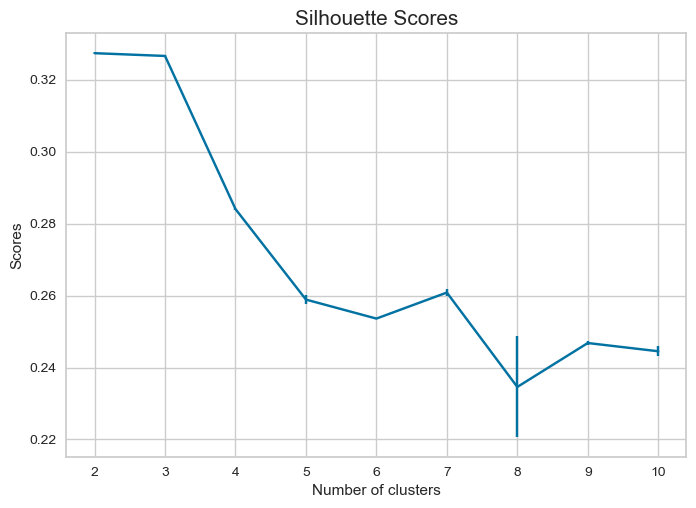

In [17]:
## 
## KMeans + Randomized Projection
## 

model = SparseRandomProjection(n_components=9, random_state=0).fit(X_raw)
X_raw_transformed = model.transform(X_raw)
num_clusters = 10 # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters=np.arange(2, num_clusters+1)
silhouettes=[]
silhouettes_errors=[]
iterations=num_clusters+1

for n in list_clusters:
    silhouettes_tmp=[]
    for _ in range(iterations):
        classifier=model(n).fit(X_raw_transformed) 
        y_pred=classifier.predict(X_raw_transformed)
        silhouette=metrics.silhouette_score(X_raw_transformed, y_pred, metric='euclidean')
        silhouettes_tmp.append(silhouette)
    temp = np.array(silhouettes_tmp)
    mean=np.mean(temp[np.argsort(temp)[:int(iterations/5)]])
    std=np.std(silhouettes_tmp)
    silhouettes.append(mean)
    silhouettes_errors.append(std)

plt.errorbar(list_clusters, silhouettes, yerr=silhouettes_errors)
plt.title("Silhouette Scores", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Scores")

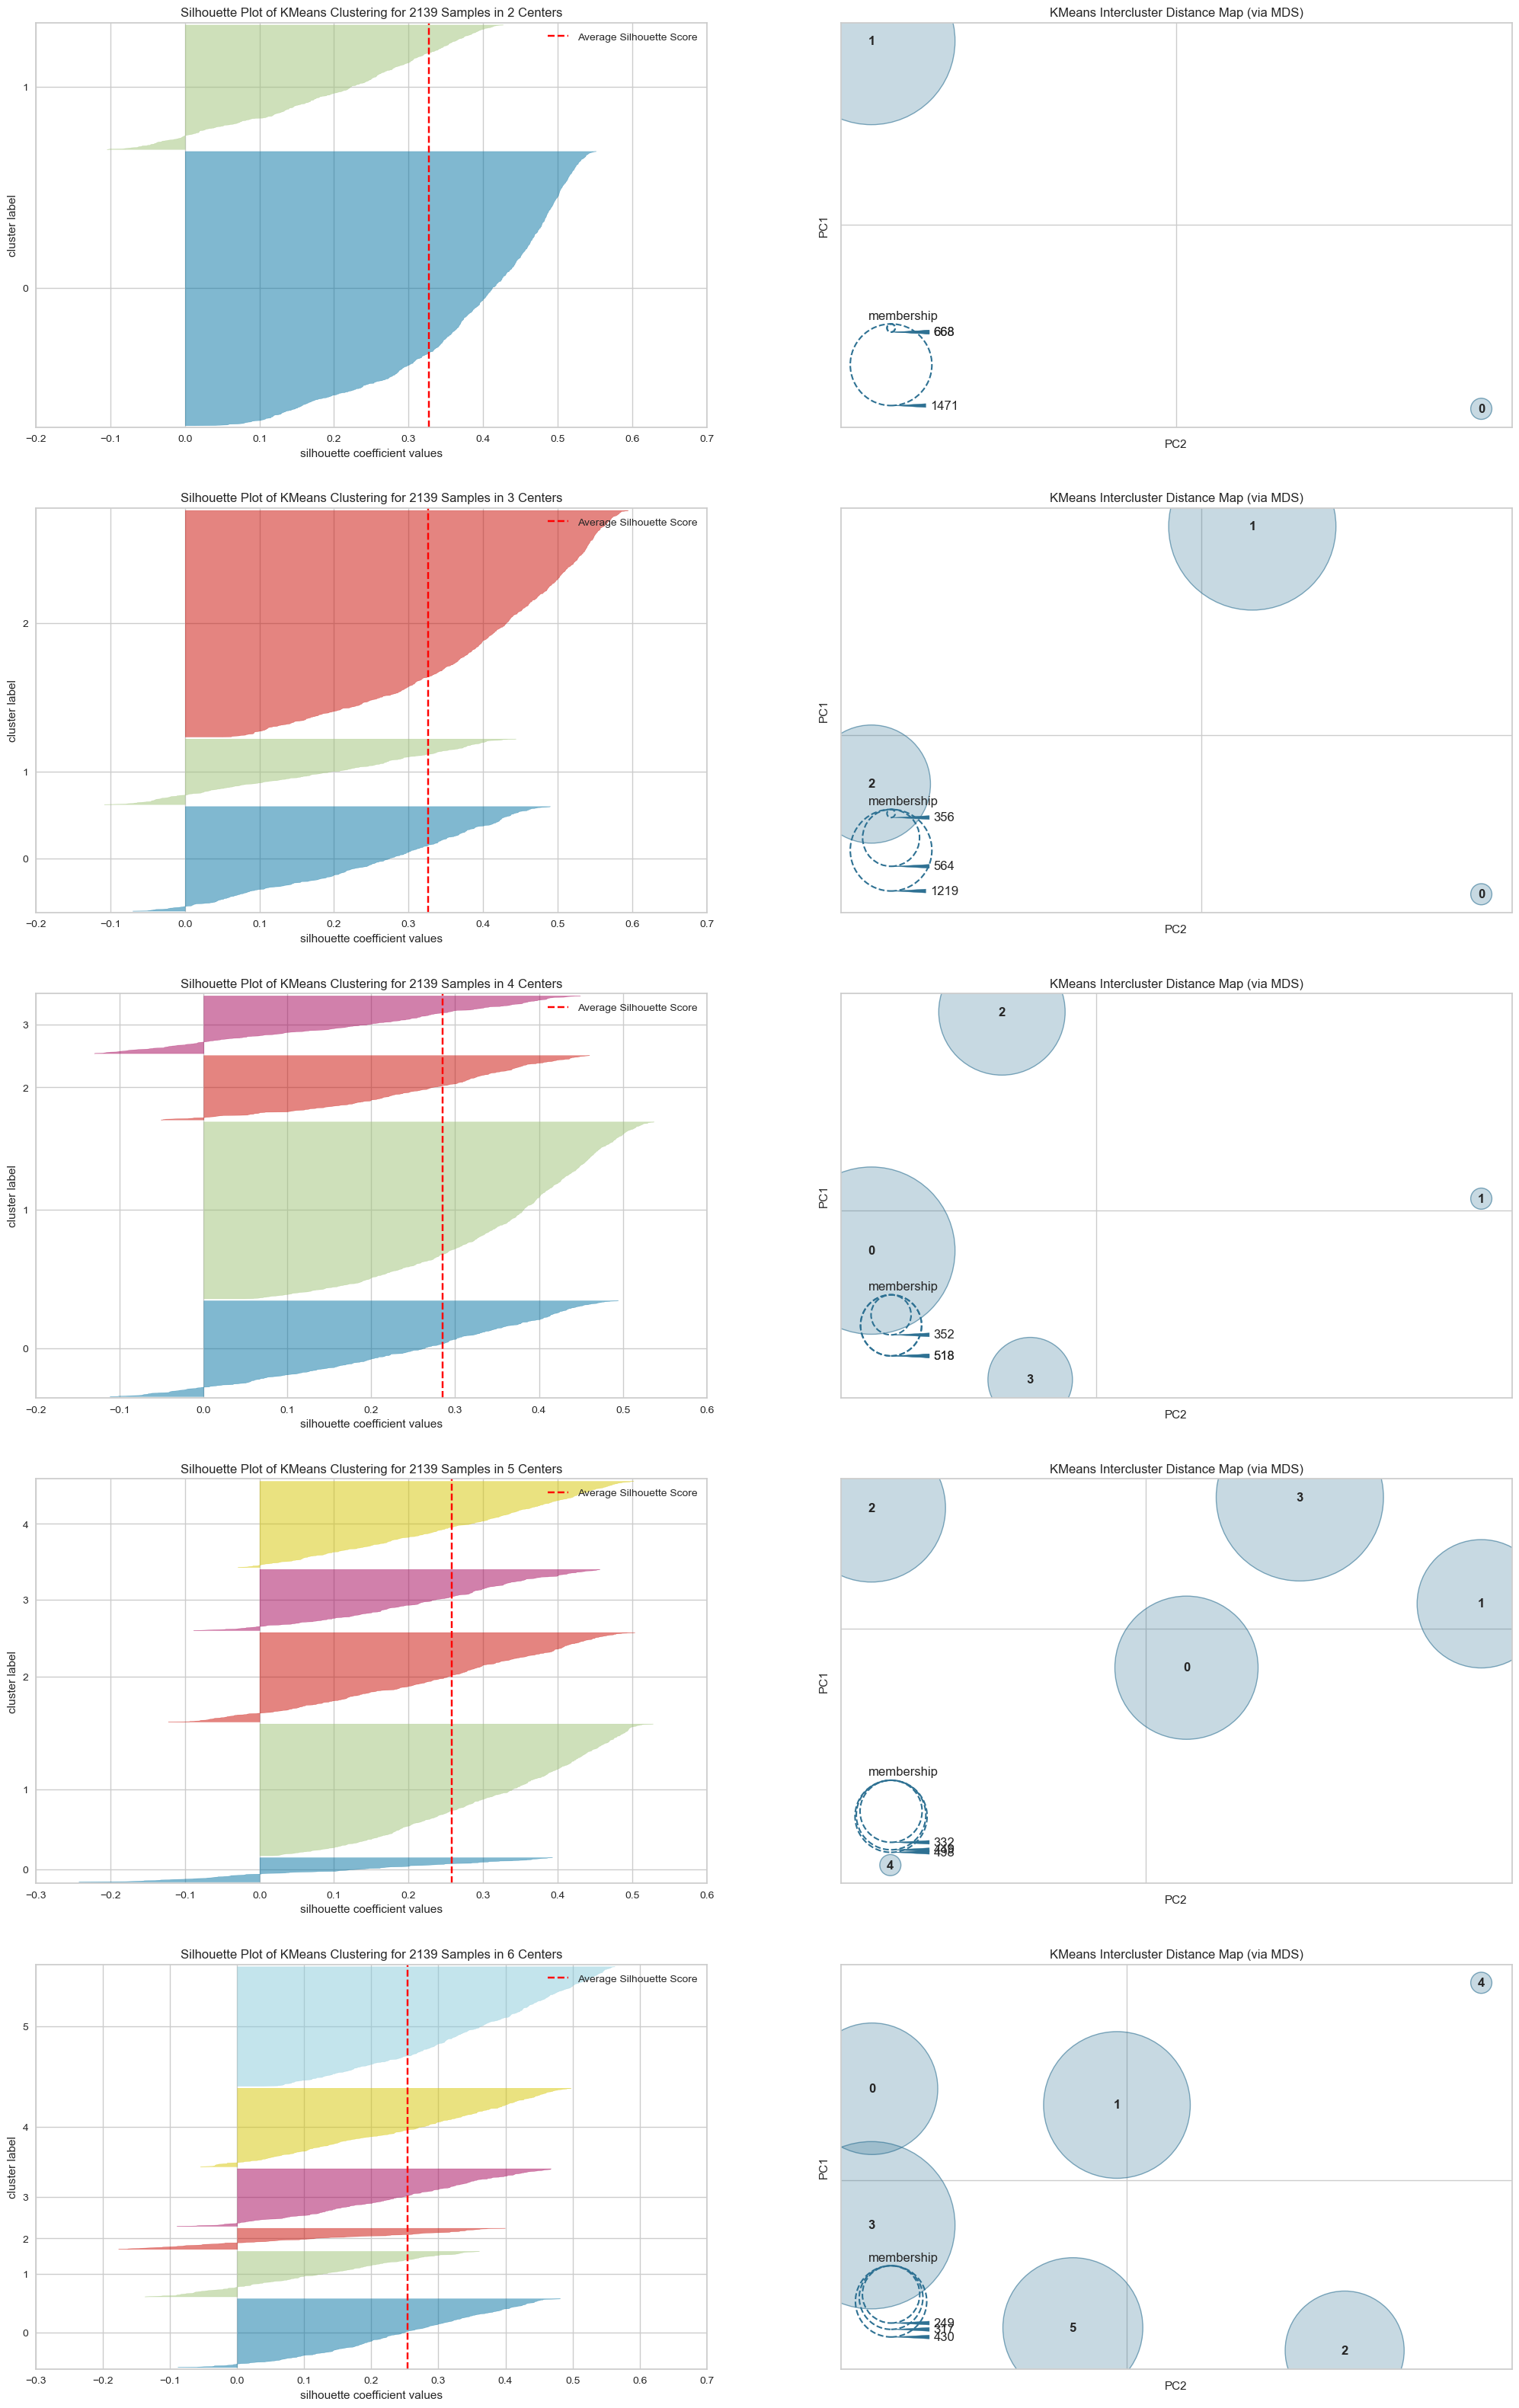

In [18]:
##
## SilhouetteVisualizer & InterclusterDistance (KMeans)
##

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
num_plots = len(list_clusters)
fig, axes = plt.subplots(num_plots, 2, figsize=[25,40])
col_ = 0
for i in list_clusters:
    classifier = model(n_clusters=i, algorithm="full")
    visualizer = SilhouetteVisualizer(classifier, colors='yellowbrick', ax=axes[col_][0])
    visualizer.fit(X_raw_transformed)
    visualizer.finalize()
        
    classifier = model(n_clusters=i, algorithm="full")
    visualizer = InterclusterDistance(classifier, ax=axes[col_][1])
    visualizer.fit(X_raw_transformed)
    visualizer.finalize()
        
    col_+=1
plt.show()

In [23]:
## 
## KMeans + Randomized Projections Training Time and Accuracy
## 

num_clusters = 2

# Training Time
start_time = time.perf_counter()
model = KMeans(n_clusters= num_clusters).fit(X_raw_transformed)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_transformed, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.3238819580292329
Cross Validation Score: 0.821732903687791
Test Accuracy: 0.8341121495327103


## KMeans (Clustering) + TruncatedSVD (Non-linear Dimensionality Reduction)

Text(0, 0.5, 'Scores')

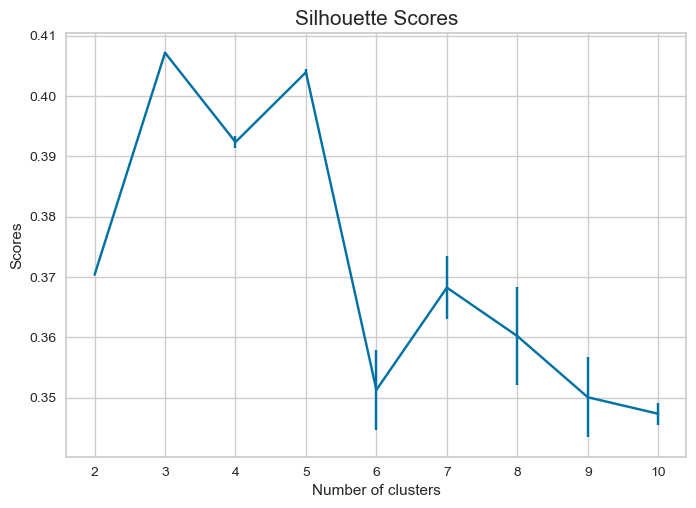

In [24]:
## 
## KMeans + TruncatedSVD
## 

model = TruncatedSVD(n_components=2).fit(X_raw)
X_raw_transformed = model.transform(X_raw)
num_clusters = 10 # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters=np.arange(2, num_clusters+1)
silhouettes=[]
silhouettes_errors=[]
iterations=num_clusters+1

for n in list_clusters:
    silhouettes_tmp=[]
    for _ in range(iterations):
        classifier=model(n).fit(X_raw_transformed) 
        y_pred=classifier.predict(X_raw_transformed)
        silhouette=metrics.silhouette_score(X_raw_transformed, y_pred, metric='euclidean')
        silhouettes_tmp.append(silhouette)
    temp = np.array(silhouettes_tmp)
    mean=np.mean(temp[np.argsort(temp)[:int(iterations/5)]])
    std=np.std(silhouettes_tmp)
    silhouettes.append(mean)
    silhouettes_errors.append(std)

plt.errorbar(list_clusters, silhouettes, yerr=silhouettes_errors)
plt.title("Silhouette Scores", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Scores")

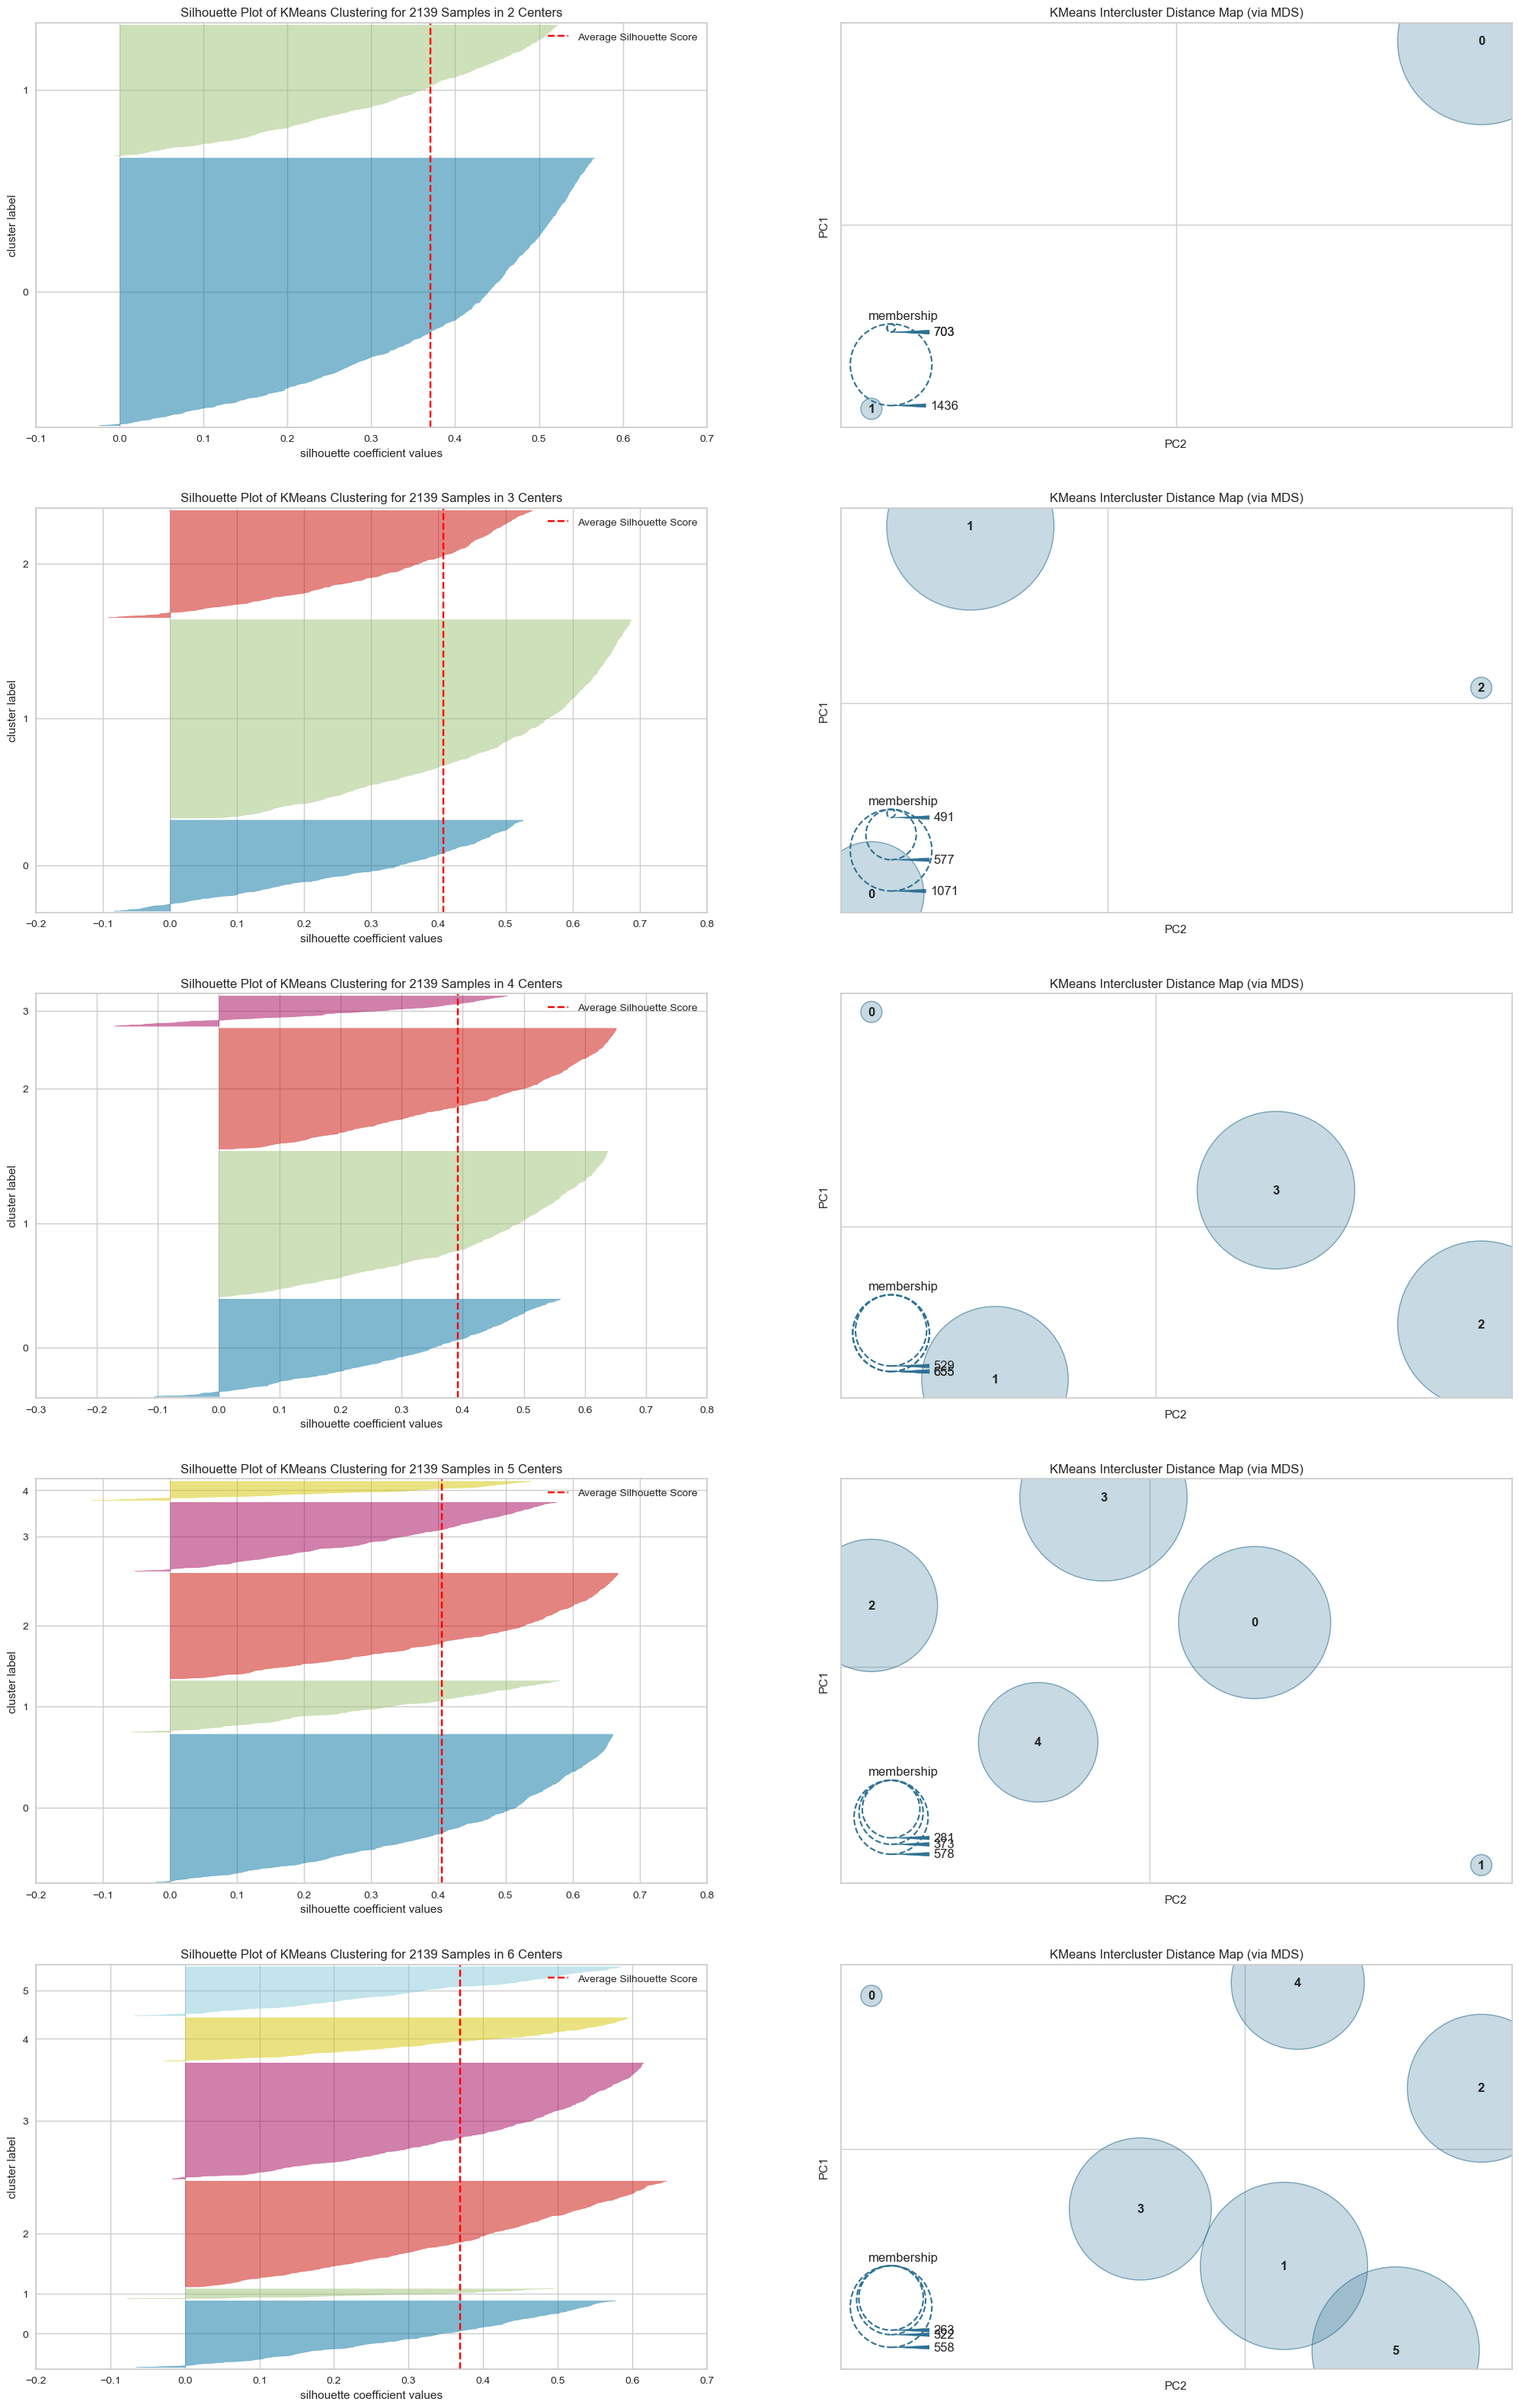

In [25]:
##
## SilhouetteVisualizer & InterclusterDistance (KMeans)
##

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
num_plots = len(list_clusters)
fig, axes = plt.subplots(num_plots, 2, figsize=[25,40])
col_ = 0
for i in list_clusters:
    classifier = model(n_clusters=i, algorithm="full")
    visualizer = SilhouetteVisualizer(classifier, colors='yellowbrick', ax=axes[col_][0])
    visualizer.fit(X_raw_transformed)
    visualizer.finalize()
        
    classifier = model(n_clusters=i, algorithm="full")
    visualizer = InterclusterDistance(classifier, ax=axes[col_][1])
    visualizer.fit(X_raw_transformed)
    visualizer.finalize()
        
    col_+=1
plt.show()

In [26]:
## 
## KMeans + TruncatedSVD Training Time and Accuracy
## 

num_clusters = 3

# Training Time
start_time = time.perf_counter()
model = KMeans(n_clusters= num_clusters).fit(X_raw_transformed)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_transformed, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.07712145894765854
Cross Validation Score: 0.6872981774163299
Test Accuracy: 0.6425233644859814


## EM (Clustering) + PCA (Linear Dimensionality Reduction)

Text(0, 0.5, 'Scores')

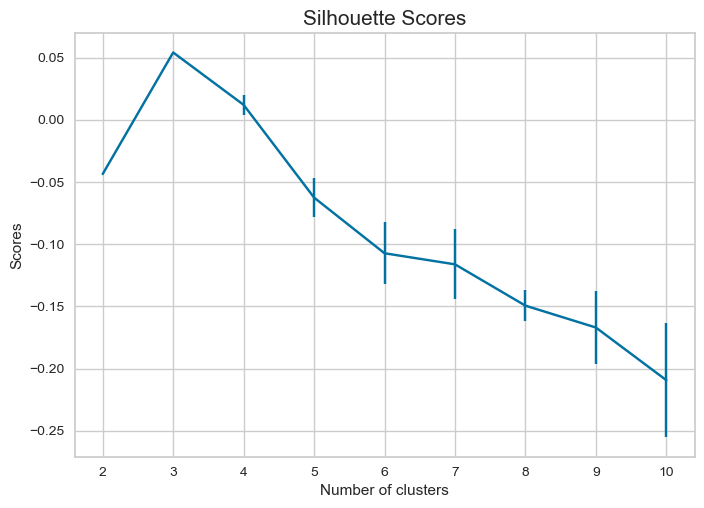

In [27]:
## 
## EM + PCA
## Silhouette Coefficient (Gaussian Mixture)
##

model = PCA(n_components=2).fit(X_raw)
X_raw_transformed = model.transform(X_raw)
num_clusters = 10 # the maximum number of clusters
model = GaussianMixture    # clustering algorithm

list_clusters=np.arange(2, num_clusters+1)
silhouettes=[]
silhouettes_errors=[]
iterations=num_clusters+1

for n in list_clusters:
    silhouettes_tmp=[]
    for _ in range(iterations):
        classifier=model(n).fit(X_raw) 
        y_pred=classifier.predict(X_raw)
        silhouette=metrics.silhouette_score(X_raw, y_pred, metric='euclidean')
        silhouettes_tmp.append(silhouette)
    temp = np.array(silhouettes_tmp)
    mean=np.mean(temp[np.argsort(temp)[:int(iterations/5)]])
    std=np.std(silhouettes_tmp)
    silhouettes.append(mean)
    silhouettes_errors.append(std)
plt.errorbar(list_clusters, silhouettes, yerr=silhouettes_errors)
plt.title("Silhouette Scores", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Scores")

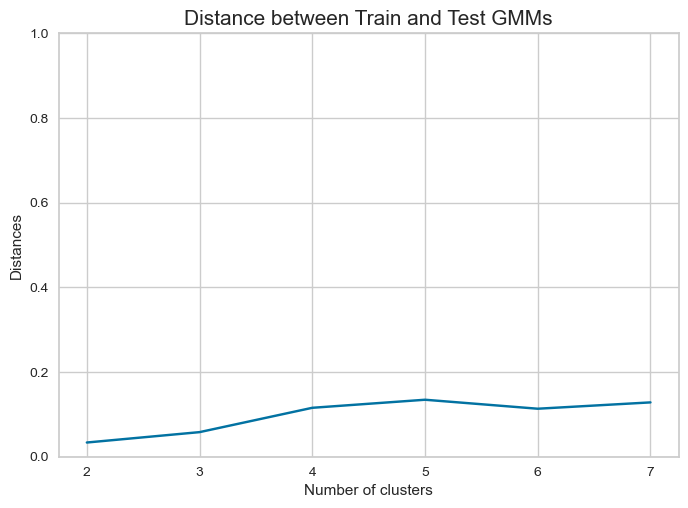

In [29]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 7  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X_raw_transformed, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

In [30]:
## 
## EM + PCA Training Time and Accuracy
## 

num_clusters = 3

# Training Time
start_time = time.perf_counter()
model = GaussianMixture(n_components= num_clusters).fit(X_raw_transformed)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_transformed, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.05935354204848409
Cross Validation Score: 0.6732801391233185
Test Accuracy: 0.6728971962616822


## EM (Clustering) + ICA (Linear Dimensionality Reduction)

In [31]:
## 
## ICA
##
model = FastICA(n_components=14, max_iter=10000, tol=0.1).fit(X_raw)
X_raw_transformed = model.transform(X_raw)

Text(0, 0.5, 'Scores')

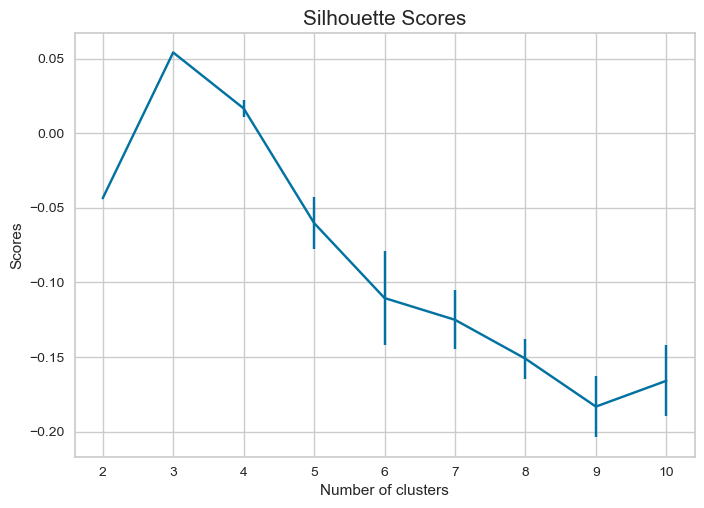

In [32]:
## 
## EM + ICA
## Silhouette Coefficient (Gaussian Mixture)
##

num_clusters = 10 # the maximum number of clusters
model = GaussianMixture    # clustering algorithm

list_clusters=np.arange(2, num_clusters+1)
silhouettes=[]
silhouettes_errors=[]
iterations=num_clusters+1

for n in list_clusters:
    silhouettes_tmp=[]
    for _ in range(iterations):
        classifier=model(n).fit(X_raw) 
        y_pred=classifier.predict(X_raw)
        silhouette=metrics.silhouette_score(X_raw, y_pred, metric='euclidean')
        silhouettes_tmp.append(silhouette)
    temp = np.array(silhouettes_tmp)
    mean=np.mean(temp[np.argsort(temp)[:int(iterations/5)]])
    std=np.std(silhouettes_tmp)
    silhouettes.append(mean)
    silhouettes_errors.append(std)
plt.errorbar(list_clusters, silhouettes, yerr=silhouettes_errors)
plt.title("Silhouette Scores", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Scores")

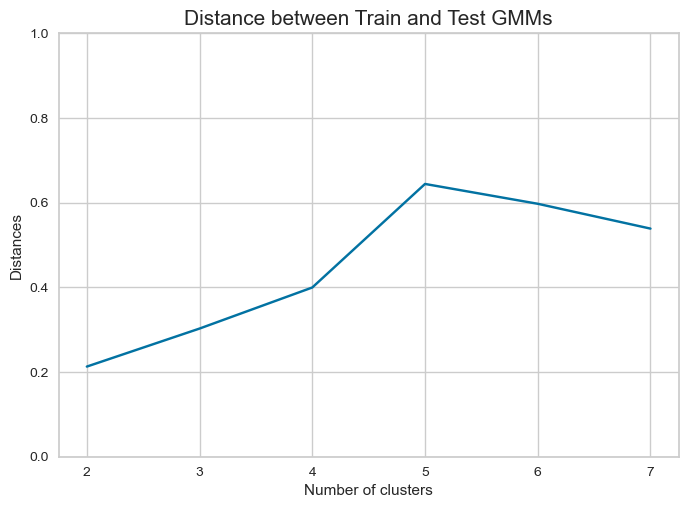

In [33]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 7  # the maximum number of clusters
model = GaussianMixture     # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X_raw_transformed, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

In [34]:
## 
## EM + ICA Training Time and Accuracy
## 

num_clusters = 3

# Training Time
start_time = time.perf_counter()
model = GaussianMixture(n_components= num_clusters).fit(X_raw_transformed)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_transformed, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.17763483407907188
Cross Validation Score: 0.8351780812575657
Test Accuracy: 0.8060747663551402


## EM (Clustering) + Randomized Projections (Linear Dimensionality Reduction)

In [35]:
## 
## Randomized Projections
##
model = SparseRandomProjection(n_components=9, random_state=0).fit(X_raw)
X_raw_transformed = model.transform(X_raw)

Text(0, 0.5, 'Scores')

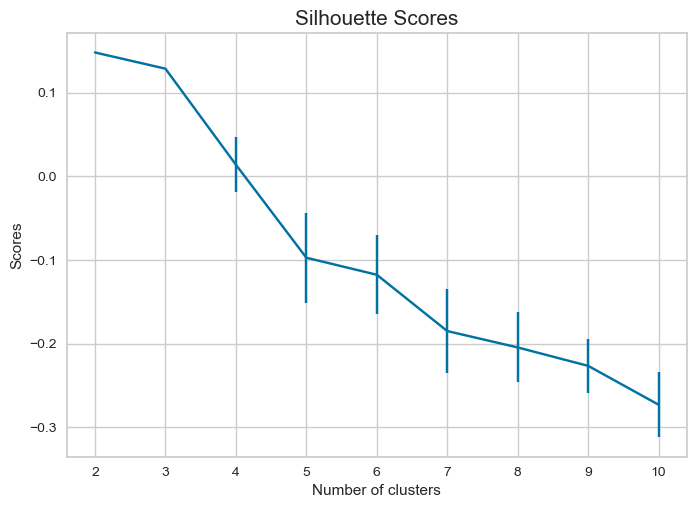

In [36]:
## 
## EM + Randomized Projection
## 

num_clusters = 10 # the maximum number of clusters
model = GaussianMixture    # clustering algorithm

list_clusters=np.arange(2, num_clusters+1)
silhouettes=[]
silhouettes_errors=[]
iterations=num_clusters+1

for n in list_clusters:
    silhouettes_tmp=[]
    for _ in range(iterations):
        classifier=model(n).fit(X_raw_transformed) 
        y_pred=classifier.predict(X_raw_transformed)
        silhouette=metrics.silhouette_score(X_raw_transformed, y_pred, metric='euclidean')
        silhouettes_tmp.append(silhouette)
    temp = np.array(silhouettes_tmp)
    mean=np.mean(temp[np.argsort(temp)[:int(iterations/5)]])
    std=np.std(silhouettes_tmp)
    silhouettes.append(mean)
    silhouettes_errors.append(std)

plt.errorbar(list_clusters, silhouettes, yerr=silhouettes_errors)
plt.title("Silhouette Scores", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Scores")

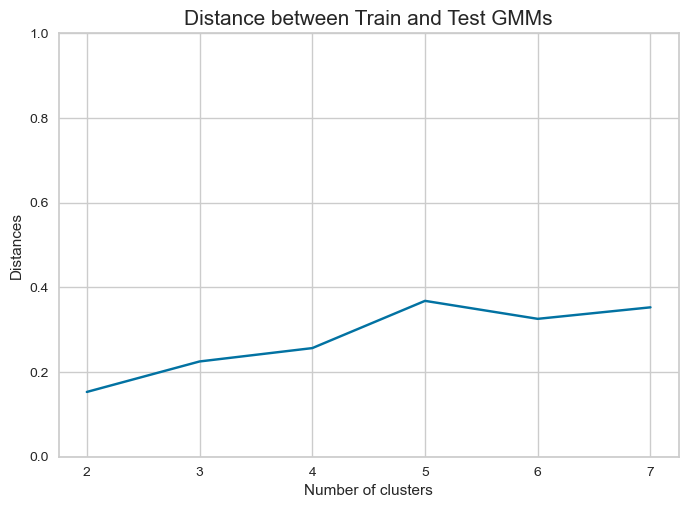

In [37]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 7  # the maximum number of clusters
model = GaussianMixture     # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X_raw_transformed, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

In [39]:
## 
## EM + Randomized Projections Training Time and Accuracy
## 

num_clusters = 2

# Training Time
start_time = time.perf_counter()
model = GaussianMixture(n_components= num_clusters).fit(X_raw_transformed)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_transformed, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.13093112502247095
Cross Validation Score: 0.8340187202700629
Test Accuracy: 0.8130841121495327


## EM (Clustering) + TruncatedSVD (No-linear Dimensionality Reduction)

In [40]:
## 
## TruncatedSVD
##
model = TruncatedSVD(n_components=2)
X_raw_transformed = model.fit_transform(X_raw)

Text(0, 0.5, 'Scores')

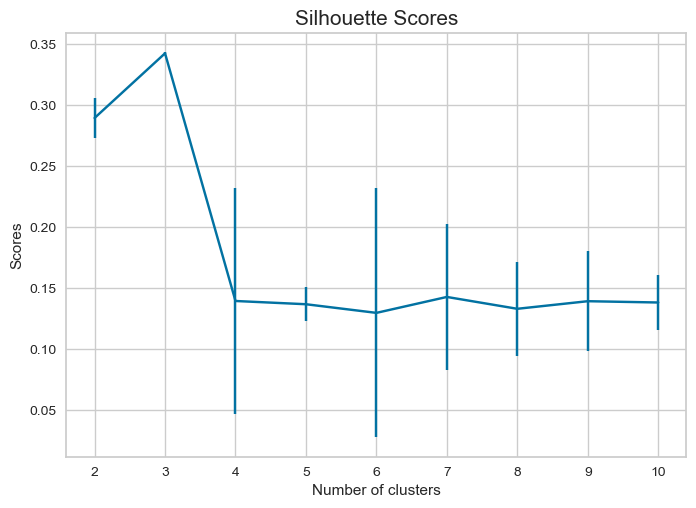

In [41]:
## 
## EM + Truncated SVD
## 

num_clusters = 10 # the maximum number of clusters
model = GaussianMixture    # clustering algorithm

list_clusters=np.arange(2, num_clusters+1)
silhouettes=[]
silhouettes_errors=[]
iterations=num_clusters+1

for n in list_clusters:
    silhouettes_tmp=[]
    for _ in range(iterations):
        classifier=model(n).fit(X_raw_transformed) 
        y_pred=classifier.predict(X_raw_transformed)
        silhouette=metrics.silhouette_score(X_raw_transformed, y_pred, metric='euclidean')
        silhouettes_tmp.append(silhouette)
    temp = np.array(silhouettes_tmp)
    mean=np.mean(temp[np.argsort(temp)[:int(iterations/5)]])
    std=np.std(silhouettes_tmp)
    silhouettes.append(mean)
    silhouettes_errors.append(std)

plt.errorbar(list_clusters, silhouettes, yerr=silhouettes_errors)
plt.title("Silhouette Scores", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Scores")

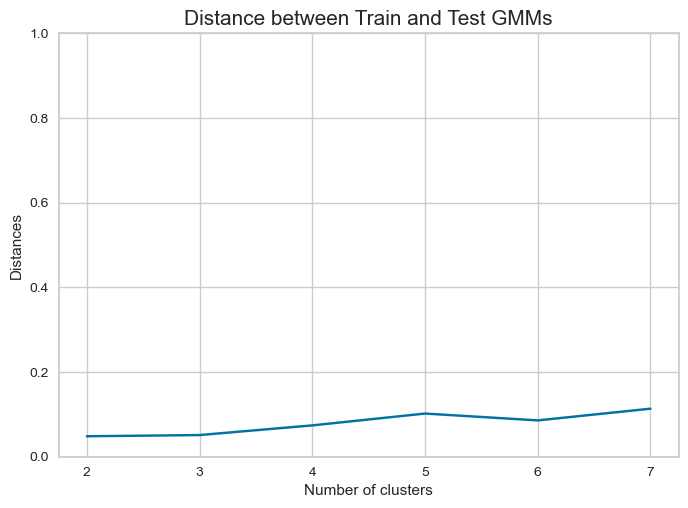

In [42]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 7  # the maximum number of clusters
model = GaussianMixture     # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X_raw_transformed, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

In [43]:
## 
## EM + TruncatedSVD Training Time and Accuracy
## 

num_clusters = 3

# Training Time
start_time = time.perf_counter()
model = GaussianMixture(n_components= num_clusters).fit(X_raw_transformed)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_transformed, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.05268654099199921
Cross Validation Score: 0.6995959285970027
Test Accuracy: 0.6892523364485982
